In [47]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


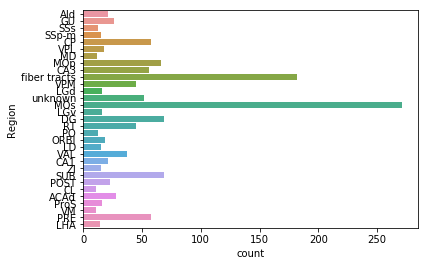

In [48]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

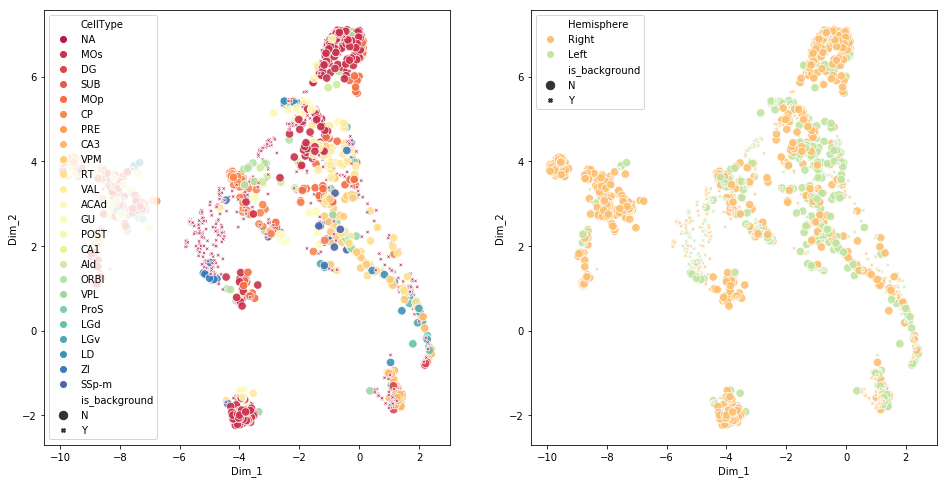

In [49]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

### Speed of parallel
* for an array testA = nmt.annotation.array[55:90,120:167,179:231].copy()
    * There are 85540 points inside
    * Takes 29.143057346343994 second to run the code.
* For the original array
    * There are 77045760 points inside
    * It may take about 7.25 hours to store all the point. We will try that this evening.

In [51]:
x_block = [range(nmt.annotation.array.shape[0])[i:i + 35] for i in range(0, nmt.annotation.array.shape[0], 35)]
y_block = [range(nmt.annotation.array.shape[1])[i:i + 35] for i in range(0, nmt.annotation.array.shape[1], 35)]
z_block = [range(nmt.annotation.array.shape[2])[i:i + 35] for i in range(0, nmt.annotation.array.shape[2], 35)]

In [52]:
import multiprocessing
import time
def Contour_block6(Temp_arr):
    co_1,co_2,co_3 = np.where(Temp_arr != 0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1 = Temp_arr[max(0,x_in-1),y_in,z_in]            # -1,0,0
        x2 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]#+1,0,0
        y1 = Temp_arr[x_in,max(0,y_in-1),z_in]# 0,-1,0
        y2 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in] # 0,+1,0
        z1 = Temp_arr[x_in,y_in,max(0,z_in-1)]# 0,0,-1
        z2 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]# 0,0,+1
        if not all(v == centerV for v in [x1,x2,y1,y2,z1,z2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)


corenum = 5
ContourDic = {}

start = time.perf_counter ()
start=time.time()


result_list=[]   
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            temp_array = nmt.annotation.array[iter_X[0]:iter_X[-1]+1,iter_Y[0]:iter_Y[-1]+1,iter_Z[0]:iter_Z[-1]+1].copy()
            result_list.append(Contour_block6(temp_array))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
#ContourDic['ALL']= ([xx for xx in  result_list])

X range: 0:35; Y range: 0:35; Z range: 0:35
X range: 0:35; Y range: 0:35; Z range: 35:70
X range: 0:35; Y range: 0:35; Z range: 70:105
X range: 0:35; Y range: 0:35; Z range: 105:140
X range: 0:35; Y range: 0:35; Z range: 140:175
X range: 0:35; Y range: 0:35; Z range: 175:210
X range: 0:35; Y range: 0:35; Z range: 210:245
X range: 0:35; Y range: 0:35; Z range: 245:280
X range: 0:35; Y range: 0:35; Z range: 280:315
X range: 0:35; Y range: 0:35; Z range: 315:350
X range: 0:35; Y range: 0:35; Z range: 350:385
X range: 0:35; Y range: 0:35; Z range: 385:420
X range: 0:35; Y range: 0:35; Z range: 420:455
X range: 0:35; Y range: 0:35; Z range: 455:456
X range: 0:35; Y range: 35:70; Z range: 0:35
X range: 0:35; Y range: 35:70; Z range: 35:70
X range: 0:35; Y range: 35:70; Z range: 70:105
X range: 0:35; Y range: 35:70; Z range: 105:140
X range: 0:35; Y range: 35:70; Z range: 140:175
X range: 0:35; Y range: 35:70; Z range: 175:210
X range: 0:35; Y range: 35:70; Z range: 210:245
X range: 0:35; Y r

X range: 35:70; Y range: 105:140; Z range: 140:175
X range: 35:70; Y range: 105:140; Z range: 175:210
X range: 35:70; Y range: 105:140; Z range: 210:245
X range: 35:70; Y range: 105:140; Z range: 245:280
X range: 35:70; Y range: 105:140; Z range: 280:315
X range: 35:70; Y range: 105:140; Z range: 315:350
X range: 35:70; Y range: 105:140; Z range: 350:385
X range: 35:70; Y range: 105:140; Z range: 385:420
X range: 35:70; Y range: 105:140; Z range: 420:455
X range: 35:70; Y range: 105:140; Z range: 455:456
X range: 35:70; Y range: 140:175; Z range: 0:35
X range: 35:70; Y range: 140:175; Z range: 35:70
X range: 35:70; Y range: 140:175; Z range: 70:105
X range: 35:70; Y range: 140:175; Z range: 105:140
X range: 35:70; Y range: 140:175; Z range: 140:175
X range: 35:70; Y range: 140:175; Z range: 175:210
X range: 35:70; Y range: 140:175; Z range: 210:245
X range: 35:70; Y range: 140:175; Z range: 245:280
X range: 35:70; Y range: 140:175; Z range: 280:315
X range: 35:70; Y range: 140:175; Z r

X range: 70:105; Y range: 175:210; Z range: 140:175
X range: 70:105; Y range: 175:210; Z range: 175:210
X range: 70:105; Y range: 175:210; Z range: 210:245
X range: 70:105; Y range: 175:210; Z range: 245:280
X range: 70:105; Y range: 175:210; Z range: 280:315
X range: 70:105; Y range: 175:210; Z range: 315:350
X range: 70:105; Y range: 175:210; Z range: 350:385
X range: 70:105; Y range: 175:210; Z range: 385:420
X range: 70:105; Y range: 175:210; Z range: 420:455
X range: 70:105; Y range: 175:210; Z range: 455:456
X range: 70:105; Y range: 210:245; Z range: 0:35
X range: 70:105; Y range: 210:245; Z range: 35:70
X range: 70:105; Y range: 210:245; Z range: 70:105
X range: 70:105; Y range: 210:245; Z range: 105:140
X range: 70:105; Y range: 210:245; Z range: 140:175
X range: 70:105; Y range: 210:245; Z range: 175:210
X range: 70:105; Y range: 210:245; Z range: 210:245
X range: 70:105; Y range: 210:245; Z range: 245:280
X range: 70:105; Y range: 210:245; Z range: 280:315
X range: 70:105; Y

X range: 105:140; Y range: 245:280; Z range: 175:210
X range: 105:140; Y range: 245:280; Z range: 210:245
X range: 105:140; Y range: 245:280; Z range: 245:280
X range: 105:140; Y range: 245:280; Z range: 280:315
X range: 105:140; Y range: 245:280; Z range: 315:350
X range: 105:140; Y range: 245:280; Z range: 350:385
X range: 105:140; Y range: 245:280; Z range: 385:420
X range: 105:140; Y range: 245:280; Z range: 420:455
X range: 105:140; Y range: 245:280; Z range: 455:456
X range: 105:140; Y range: 280:315; Z range: 0:35
X range: 105:140; Y range: 280:315; Z range: 35:70
X range: 105:140; Y range: 280:315; Z range: 70:105
X range: 105:140; Y range: 280:315; Z range: 105:140
X range: 105:140; Y range: 280:315; Z range: 140:175
X range: 105:140; Y range: 280:315; Z range: 175:210
X range: 105:140; Y range: 280:315; Z range: 210:245
X range: 105:140; Y range: 280:315; Z range: 245:280
X range: 105:140; Y range: 280:315; Z range: 280:315
X range: 105:140; Y range: 280:315; Z range: 315:350

X range: 175:210; Y range: 35:70; Z range: 105:140
X range: 175:210; Y range: 35:70; Z range: 140:175
X range: 175:210; Y range: 35:70; Z range: 175:210
X range: 175:210; Y range: 35:70; Z range: 210:245
X range: 175:210; Y range: 35:70; Z range: 245:280
X range: 175:210; Y range: 35:70; Z range: 280:315
X range: 175:210; Y range: 35:70; Z range: 315:350
X range: 175:210; Y range: 35:70; Z range: 350:385
X range: 175:210; Y range: 35:70; Z range: 385:420
X range: 175:210; Y range: 35:70; Z range: 420:455
X range: 175:210; Y range: 35:70; Z range: 455:456
X range: 175:210; Y range: 70:105; Z range: 0:35
X range: 175:210; Y range: 70:105; Z range: 35:70
X range: 175:210; Y range: 70:105; Z range: 70:105
X range: 175:210; Y range: 70:105; Z range: 105:140
X range: 175:210; Y range: 70:105; Z range: 140:175
X range: 175:210; Y range: 70:105; Z range: 175:210
X range: 175:210; Y range: 70:105; Z range: 210:245
X range: 175:210; Y range: 70:105; Z range: 245:280
X range: 175:210; Y range: 70

X range: 210:245; Y range: 70:105; Z range: 245:280
X range: 210:245; Y range: 70:105; Z range: 280:315
X range: 210:245; Y range: 70:105; Z range: 315:350
X range: 210:245; Y range: 70:105; Z range: 350:385
X range: 210:245; Y range: 70:105; Z range: 385:420
X range: 210:245; Y range: 70:105; Z range: 420:455
X range: 210:245; Y range: 70:105; Z range: 455:456
X range: 210:245; Y range: 105:140; Z range: 0:35
X range: 210:245; Y range: 105:140; Z range: 35:70
X range: 210:245; Y range: 105:140; Z range: 70:105
X range: 210:245; Y range: 105:140; Z range: 105:140
X range: 210:245; Y range: 105:140; Z range: 140:175
X range: 210:245; Y range: 105:140; Z range: 175:210
X range: 210:245; Y range: 105:140; Z range: 210:245
X range: 210:245; Y range: 105:140; Z range: 245:280
X range: 210:245; Y range: 105:140; Z range: 280:315
X range: 210:245; Y range: 105:140; Z range: 315:350
X range: 210:245; Y range: 105:140; Z range: 350:385
X range: 210:245; Y range: 105:140; Z range: 385:420
X rang

X range: 245:280; Y range: 105:140; Z range: 385:420
X range: 245:280; Y range: 105:140; Z range: 420:455
X range: 245:280; Y range: 105:140; Z range: 455:456
X range: 245:280; Y range: 140:175; Z range: 0:35
X range: 245:280; Y range: 140:175; Z range: 35:70
X range: 245:280; Y range: 140:175; Z range: 70:105
X range: 245:280; Y range: 140:175; Z range: 105:140
X range: 245:280; Y range: 140:175; Z range: 140:175
X range: 245:280; Y range: 140:175; Z range: 175:210
X range: 245:280; Y range: 140:175; Z range: 210:245
X range: 245:280; Y range: 140:175; Z range: 245:280
X range: 245:280; Y range: 140:175; Z range: 280:315
X range: 245:280; Y range: 140:175; Z range: 315:350
X range: 245:280; Y range: 140:175; Z range: 350:385
X range: 245:280; Y range: 140:175; Z range: 385:420
X range: 245:280; Y range: 140:175; Z range: 420:455
X range: 245:280; Y range: 140:175; Z range: 455:456
X range: 245:280; Y range: 175:210; Z range: 0:35
X range: 245:280; Y range: 175:210; Z range: 35:70
X ra

X range: 280:315; Y range: 175:210; Z range: 35:70
X range: 280:315; Y range: 175:210; Z range: 70:105
X range: 280:315; Y range: 175:210; Z range: 105:140
X range: 280:315; Y range: 175:210; Z range: 140:175
X range: 280:315; Y range: 175:210; Z range: 175:210
X range: 280:315; Y range: 175:210; Z range: 210:245
X range: 280:315; Y range: 175:210; Z range: 245:280
X range: 280:315; Y range: 175:210; Z range: 280:315
X range: 280:315; Y range: 175:210; Z range: 315:350
X range: 280:315; Y range: 175:210; Z range: 350:385
X range: 280:315; Y range: 175:210; Z range: 385:420
X range: 280:315; Y range: 175:210; Z range: 420:455
X range: 280:315; Y range: 175:210; Z range: 455:456
X range: 280:315; Y range: 210:245; Z range: 0:35
X range: 280:315; Y range: 210:245; Z range: 35:70
X range: 280:315; Y range: 210:245; Z range: 70:105
X range: 280:315; Y range: 210:245; Z range: 105:140
X range: 280:315; Y range: 210:245; Z range: 140:175
X range: 280:315; Y range: 210:245; Z range: 175:210
X 

X range: 315:350; Y range: 210:245; Z range: 175:210
X range: 315:350; Y range: 210:245; Z range: 210:245
X range: 315:350; Y range: 210:245; Z range: 245:280
X range: 315:350; Y range: 210:245; Z range: 280:315
X range: 315:350; Y range: 210:245; Z range: 315:350
X range: 315:350; Y range: 210:245; Z range: 350:385
X range: 315:350; Y range: 210:245; Z range: 385:420
X range: 315:350; Y range: 210:245; Z range: 420:455
X range: 315:350; Y range: 210:245; Z range: 455:456
X range: 315:350; Y range: 245:280; Z range: 0:35
X range: 315:350; Y range: 245:280; Z range: 35:70
X range: 315:350; Y range: 245:280; Z range: 70:105
X range: 315:350; Y range: 245:280; Z range: 105:140
X range: 315:350; Y range: 245:280; Z range: 140:175
X range: 315:350; Y range: 245:280; Z range: 175:210
X range: 315:350; Y range: 245:280; Z range: 210:245
X range: 315:350; Y range: 245:280; Z range: 245:280
X range: 315:350; Y range: 245:280; Z range: 280:315
X range: 315:350; Y range: 245:280; Z range: 315:350

X range: 350:385; Y range: 280:315; Z range: 175:210
X range: 350:385; Y range: 280:315; Z range: 210:245
X range: 350:385; Y range: 280:315; Z range: 245:280
X range: 350:385; Y range: 280:315; Z range: 280:315
X range: 350:385; Y range: 280:315; Z range: 315:350
X range: 350:385; Y range: 280:315; Z range: 350:385
X range: 350:385; Y range: 280:315; Z range: 385:420
X range: 350:385; Y range: 280:315; Z range: 420:455
X range: 350:385; Y range: 280:315; Z range: 455:456
X range: 350:385; Y range: 315:320; Z range: 0:35
X range: 350:385; Y range: 315:320; Z range: 35:70
X range: 350:385; Y range: 315:320; Z range: 70:105
X range: 350:385; Y range: 315:320; Z range: 105:140
X range: 350:385; Y range: 315:320; Z range: 140:175
X range: 350:385; Y range: 315:320; Z range: 175:210
X range: 350:385; Y range: 315:320; Z range: 210:245
X range: 350:385; Y range: 315:320; Z range: 245:280
X range: 350:385; Y range: 315:320; Z range: 280:315
X range: 350:385; Y range: 315:320; Z range: 315:350

X range: 420:455; Y range: 35:70; Z range: 140:175
X range: 420:455; Y range: 35:70; Z range: 175:210
X range: 420:455; Y range: 35:70; Z range: 210:245
X range: 420:455; Y range: 35:70; Z range: 245:280
X range: 420:455; Y range: 35:70; Z range: 280:315
X range: 420:455; Y range: 35:70; Z range: 315:350
X range: 420:455; Y range: 35:70; Z range: 350:385
X range: 420:455; Y range: 35:70; Z range: 385:420
X range: 420:455; Y range: 35:70; Z range: 420:455
X range: 420:455; Y range: 35:70; Z range: 455:456
X range: 420:455; Y range: 70:105; Z range: 0:35
X range: 420:455; Y range: 70:105; Z range: 35:70
X range: 420:455; Y range: 70:105; Z range: 70:105
X range: 420:455; Y range: 70:105; Z range: 105:140
X range: 420:455; Y range: 70:105; Z range: 140:175
X range: 420:455; Y range: 70:105; Z range: 175:210
X range: 420:455; Y range: 70:105; Z range: 210:245
X range: 420:455; Y range: 70:105; Z range: 245:280
X range: 420:455; Y range: 70:105; Z range: 280:315
X range: 420:455; Y range: 7

X range: 455:490; Y range: 70:105; Z range: 280:315
X range: 455:490; Y range: 70:105; Z range: 315:350
X range: 455:490; Y range: 70:105; Z range: 350:385
X range: 455:490; Y range: 70:105; Z range: 385:420
X range: 455:490; Y range: 70:105; Z range: 420:455
X range: 455:490; Y range: 70:105; Z range: 455:456
X range: 455:490; Y range: 105:140; Z range: 0:35
X range: 455:490; Y range: 105:140; Z range: 35:70
X range: 455:490; Y range: 105:140; Z range: 70:105
X range: 455:490; Y range: 105:140; Z range: 105:140
X range: 455:490; Y range: 105:140; Z range: 140:175
X range: 455:490; Y range: 105:140; Z range: 175:210
X range: 455:490; Y range: 105:140; Z range: 210:245
X range: 455:490; Y range: 105:140; Z range: 245:280
X range: 455:490; Y range: 105:140; Z range: 280:315
X range: 455:490; Y range: 105:140; Z range: 315:350
X range: 455:490; Y range: 105:140; Z range: 350:385
X range: 455:490; Y range: 105:140; Z range: 385:420
X range: 455:490; Y range: 105:140; Z range: 420:455
X ran

X range: 490:525; Y range: 140:175; Z range: 70:105
X range: 490:525; Y range: 140:175; Z range: 105:140
X range: 490:525; Y range: 140:175; Z range: 140:175
X range: 490:525; Y range: 140:175; Z range: 175:210
X range: 490:525; Y range: 140:175; Z range: 210:245
X range: 490:525; Y range: 140:175; Z range: 245:280
X range: 490:525; Y range: 140:175; Z range: 280:315
X range: 490:525; Y range: 140:175; Z range: 315:350
X range: 490:525; Y range: 140:175; Z range: 350:385
X range: 490:525; Y range: 140:175; Z range: 385:420
X range: 490:525; Y range: 140:175; Z range: 420:455
X range: 490:525; Y range: 140:175; Z range: 455:456
X range: 490:525; Y range: 175:210; Z range: 0:35
X range: 490:525; Y range: 175:210; Z range: 35:70
X range: 490:525; Y range: 175:210; Z range: 70:105
X range: 490:525; Y range: 175:210; Z range: 105:140
X range: 490:525; Y range: 175:210; Z range: 140:175
X range: 490:525; Y range: 175:210; Z range: 175:210
X range: 490:525; Y range: 175:210; Z range: 210:245


X range: 525:528; Y range: 210:245; Z range: 175:210
X range: 525:528; Y range: 210:245; Z range: 210:245
X range: 525:528; Y range: 210:245; Z range: 245:280
X range: 525:528; Y range: 210:245; Z range: 280:315
X range: 525:528; Y range: 210:245; Z range: 315:350
X range: 525:528; Y range: 210:245; Z range: 350:385
X range: 525:528; Y range: 210:245; Z range: 385:420
X range: 525:528; Y range: 210:245; Z range: 420:455
X range: 525:528; Y range: 210:245; Z range: 455:456
X range: 525:528; Y range: 245:280; Z range: 0:35
X range: 525:528; Y range: 245:280; Z range: 35:70
X range: 525:528; Y range: 245:280; Z range: 70:105
X range: 525:528; Y range: 245:280; Z range: 105:140
X range: 525:528; Y range: 245:280; Z range: 140:175
X range: 525:528; Y range: 245:280; Z range: 175:210
X range: 525:528; Y range: 245:280; Z range: 210:245
X range: 525:528; Y range: 245:280; Z range: 245:280
X range: 525:528; Y range: 245:280; Z range: 280:315
X range: 525:528; Y range: 245:280; Z range: 315:350

In [36]:
result_final =  [x for x in result_list if len(x)>0]

In [55]:
Contour_M = nmt.annotation.array.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i]=3
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

Time needed to generate that block is 0.005758523941040039
Time needed to generate that block is 0.09607744216918945
Time needed to generate that block is 0.03526115417480469
Time needed to generate that block is 0.08265399932861328
Time needed to generate that block is 0.017136812210083008
Time needed to generate that block is 0.23810958862304688
Time needed to generate that block is 0.2961399555206299
Time needed to generate that block is 0.3893592357635498
Time needed to generate that block is 0.28682780265808105
Time needed to generate that block is 0.29123401641845703
Time needed to generate that block is 0.007720470428466797
Time needed to generate that block is 0.0005199909210205078
Time needed to generate that block is 0.3633253574371338
Time needed to generate that block is 0.2653470039367676
Time needed to generate that block is 0.42277026176452637
Time needed to generate that block is 0.2699289321899414
Time needed to generate that block is 0.3826315402984619
Time needed to 

Time needed to generate that block is 0.8570041656494141
Time needed to generate that block is 0.9159801006317139
Time needed to generate that block is 0.7167232036590576
Time needed to generate that block is 0.7101306915283203
Time needed to generate that block is 0.6234011650085449
Time needed to generate that block is 0.17983388900756836
Time needed to generate that block is 0.002179861068725586
Time needed to generate that block is 0.2507295608520508
Time needed to generate that block is 0.28360915184020996
Time needed to generate that block is 0.4135611057281494
Time needed to generate that block is 0.5432417392730713
Time needed to generate that block is 0.42212414741516113
Time needed to generate that block is 0.24048519134521484
Time needed to generate that block is 0.3912668228149414
Time needed to generate that block is 0.012362957000732422
Time needed to generate that block is 0.02988266944885254
Time needed to generate that block is 0.24408864974975586
Time needed to genera

Time needed to generate that block is 0.44593191146850586
Time needed to generate that block is 0.5227651596069336
Time needed to generate that block is 0.6445133686065674
Time needed to generate that block is 0.44924044609069824
Time needed to generate that block is 0.7185313701629639
Time needed to generate that block is 0.9627082347869873
Time needed to generate that block is 0.7470316886901855
Time needed to generate that block is 0.3526172637939453
Time needed to generate that block is 0.6741578578948975
Time needed to generate that block is 0.51249098777771
Time needed to generate that block is 0.5227265357971191
Time needed to generate that block is 0.044851064682006836
Time needed to generate that block is 0.006555080413818359
Time needed to generate that block is 0.6567130088806152
Time needed to generate that block is 0.7434988021850586
Time needed to generate that block is 0.6368720531463623
Time needed to generate that block is 0.23900389671325684
Time needed to generate th

Time needed to generate that block is 0.4433729648590088
Time needed to generate that block is 0.7352550029754639
Time needed to generate that block is 0.8684902191162109
Time needed to generate that block is 0.7377943992614746
Time needed to generate that block is 0.5557537078857422
Time needed to generate that block is 0.28867053985595703
Time needed to generate that block is 0.5593032836914062
Time needed to generate that block is 0.3834700584411621
Time needed to generate that block is 0.053919076919555664
Time needed to generate that block is 0.042572021484375
Time needed to generate that block is 0.21935367584228516
Time needed to generate that block is 0.5522000789642334
Time needed to generate that block is 0.270122766494751
Time needed to generate that block is 0.6676056385040283
Time needed to generate that block is 0.8908681869506836
Time needed to generate that block is 0.7663042545318604
Time needed to generate that block is 0.30469703674316406
Time needed to generate that

Time needed to generate that block is 0.7034463882446289
Time needed to generate that block is 0.7456753253936768
Time needed to generate that block is 0.7663929462432861
Time needed to generate that block is 0.5539307594299316
Time needed to generate that block is 0.6988670825958252
Time needed to generate that block is 0.4131948947906494
Time needed to generate that block is 0.045412540435791016
Time needed to generate that block is 0.0008153915405273438
Time needed to generate that block is 0.0007061958312988281
Time needed to generate that block is 0.0005981922149658203
Time needed to generate that block is 0.15655755996704102
Time needed to generate that block is 0.33106493949890137
Time needed to generate that block is 0.49592089653015137
Time needed to generate that block is 0.2127382755279541
Time needed to generate that block is 0.4550344944000244
Time needed to generate that block is 0.38165807723999023
Time needed to generate that block is 0.2103731632232666
Time needed to g

Time needed to generate that block is 0.26045656204223633
Time needed to generate that block is 0.5898556709289551
Time needed to generate that block is 0.532250165939331
Time needed to generate that block is 0.39160656929016113
Time needed to generate that block is 0.559241533279419
Time needed to generate that block is 0.5892829895019531
Time needed to generate that block is 0.30717921257019043
Time needed to generate that block is 0.05587363243103027
Time needed to generate that block is 0.1724848747253418
Time needed to generate that block is 0.5825467109680176
Time needed to generate that block is 0.9400439262390137
Time needed to generate that block is 1.2098438739776611
Time needed to generate that block is 0.9337325096130371
Time needed to generate that block is 0.7755610942840576
Time needed to generate that block is 0.9888017177581787
Time needed to generate that block is 1.192650556564331
Time needed to generate that block is 0.9509193897247314
Time needed to generate that b

Time needed to generate that block is 0.30736684799194336
Time needed to generate that block is 0.7839269638061523
Time needed to generate that block is 1.1555848121643066
Time needed to generate that block is 1.1026251316070557
Time needed to generate that block is 0.794893741607666
Time needed to generate that block is 0.7391722202301025
Time needed to generate that block is 0.6122598648071289
Time needed to generate that block is 1.0929887294769287
Time needed to generate that block is 1.2504277229309082
Time needed to generate that block is 0.7958188056945801
Time needed to generate that block is 0.43651652336120605
Time needed to generate that block is 0.008356094360351562
Time needed to generate that block is 0.3068399429321289
Time needed to generate that block is 0.8798806667327881
Time needed to generate that block is 0.9895279407501221
Time needed to generate that block is 0.4240095615386963
Time needed to generate that block is 0.5307445526123047
Time needed to generate that

Time needed to generate that block is 0.23921561241149902
Time needed to generate that block is 0.8965506553649902
Time needed to generate that block is 1.0158569812774658
Time needed to generate that block is 0.9108905792236328
Time needed to generate that block is 0.834148645401001
Time needed to generate that block is 0.8987562656402588
Time needed to generate that block is 0.7937674522399902
Time needed to generate that block is 0.8573782444000244
Time needed to generate that block is 0.9436745643615723
Time needed to generate that block is 0.8421432971954346
Time needed to generate that block is 1.0362763404846191
Time needed to generate that block is 0.9113979339599609
Time needed to generate that block is 0.4511749744415283
Time needed to generate that block is 0.025962352752685547
Time needed to generate that block is 0.8387022018432617
Time needed to generate that block is 1.0653634071350098
Time needed to generate that block is 0.40041351318359375
Time needed to generate that

Time needed to generate that block is 0.5119528770446777
Time needed to generate that block is 1.0265545845031738
Time needed to generate that block is 1.0669057369232178
Time needed to generate that block is 0.7659642696380615
Time needed to generate that block is 0.526996374130249
Time needed to generate that block is 0.46738767623901367
Time needed to generate that block is 0.28597497940063477
Time needed to generate that block is 0.45549511909484863
Time needed to generate that block is 0.42595791816711426
Time needed to generate that block is 0.7692341804504395
Time needed to generate that block is 0.9250502586364746
Time needed to generate that block is 1.0852859020233154
Time needed to generate that block is 0.669776201248169
Time needed to generate that block is 0.015198469161987305
Time needed to generate that block is 0.02887582778930664
Time needed to generate that block is 1.0425691604614258
Time needed to generate that block is 1.0399117469787598
Time needed to generate th

Time needed to generate that block is 0.4486677646636963
Time needed to generate that block is 0.315582275390625
Time needed to generate that block is 0.7695388793945312
Time needed to generate that block is 0.5079915523529053
Time needed to generate that block is 0.6448724269866943
Time needed to generate that block is 0.8042669296264648
Time needed to generate that block is 0.8753783702850342
Time needed to generate that block is 1.024897813796997
Time needed to generate that block is 0.9089281558990479
Time needed to generate that block is 0.7595405578613281
Time needed to generate that block is 0.8193225860595703
Time needed to generate that block is 0.46645522117614746
Time needed to generate that block is 0.7415285110473633
Time needed to generate that block is 0.48908019065856934
Time needed to generate that block is 0.15760540962219238
Time needed to generate that block is 0.5660297870635986
Time needed to generate that block is 0.42043638229370117
Time needed to generate that 

Time needed to generate that block is 0.696319580078125
Time needed to generate that block is 0.41277122497558594
Time needed to generate that block is 0.34140896797180176
Time needed to generate that block is 0.9168767929077148
Time needed to generate that block is 0.1386566162109375
Time needed to generate that block is 0.1012423038482666
Time needed to generate that block is 0.07463216781616211
Time needed to generate that block is 0.002683877944946289
Time needed to generate that block is 0.0951700210571289
Time needed to generate that block is 0.4886600971221924
Time needed to generate that block is 0.5690500736236572
Time needed to generate that block is 0.8360908031463623
Time needed to generate that block is 0.6255757808685303
Time needed to generate that block is 0.4202756881713867
Time needed to generate that block is 0.24870777130126953
Time needed to generate that block is 0.0076143741607666016
Time needed to generate that block is 0.04061579704284668
Time needed to generat

Time needed to generate that block is 0.0509335994720459
Time needed to generate that block is 0.08634090423583984
Time needed to generate that block is 0.30524492263793945
Time needed to generate that block is 0.5744075775146484
Time needed to generate that block is 0.505695104598999
Time needed to generate that block is 0.7829234600067139
Time needed to generate that block is 0.7351858615875244
Time needed to generate that block is 0.7409224510192871
Time needed to generate that block is 0.6076962947845459
Time needed to generate that block is 0.5938551425933838
Time needed to generate that block is 0.362471342086792
Time needed to generate that block is 0.12937688827514648
Time needed to generate that block is 0.10053634643554688
Time needed to generate that block is 0.2729830741882324
Time needed to generate that block is 0.2897355556488037
Time needed to generate that block is 0.5518836975097656
Time needed to generate that block is 0.5554821491241455
Time needed to generate that 

In [56]:
pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M_6.pickle", "wb"))

In [58]:
regionN, count = np.unique(np.multiply(Contour_M==3,nmt.annotation.array), return_counts=True)
regionN

array([   0,  507,  698, 1016], dtype=uint32)